In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## GlobalTemperatures

In [ ]:
globalTemperature = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

globalTemperature.head()

In [ ]:
globalTemperature.columns

In [ ]:
globalTemperature['LandAverageTemperature'].value_counts()

In [ ]:
globalTemperature['LandAverageTemperature'].mean()

## H0: μ = 8.37

## H1: μ # 8.37

In [ ]:
sample_data_for_globalTemperature = globalTemperature['LandAverageTemperature']

In [ ]:
sample_data_for_globalTemperature

## Calucalte t_statistic and p_value

In [ ]:
import numpy as np
import scipy.stats as stats

def t_statistic(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

In [ ]:
t = t_statistic(sample_data_for_globalTemperature, 8.37)
p = p_value(t)

In [ ]:
t, p

## globalTemperatureByCity

In [ ]:
globalTemperatureByCity = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")

globalTemperatureByCity.head()

In [ ]:
globalTemperatureByCity['AverageTemperature'].value_counts()

In [ ]:
globalTemperatureByCity['AverageTemperature'].mean()

## H0: μ = 16.7274

## H1: μ # 16.7274

In [ ]:
X1 = globalTemperatureByCity['Latitude']
X2 = globalTemperatureByCity['AverageTemperature']

### Calculate t_statistic and p_value

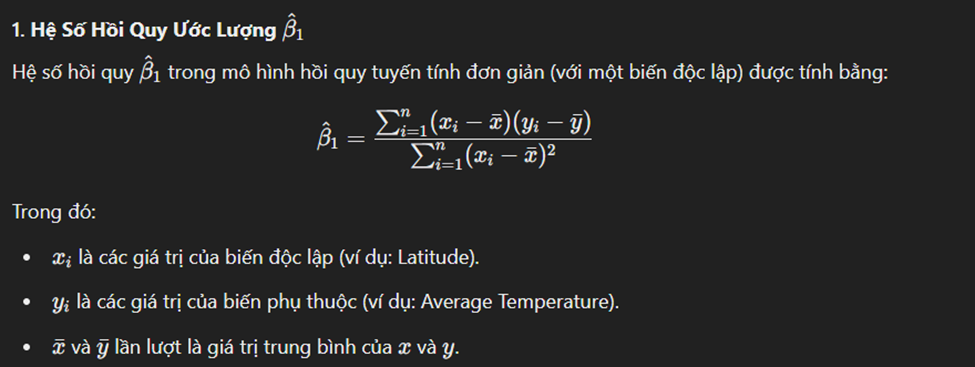
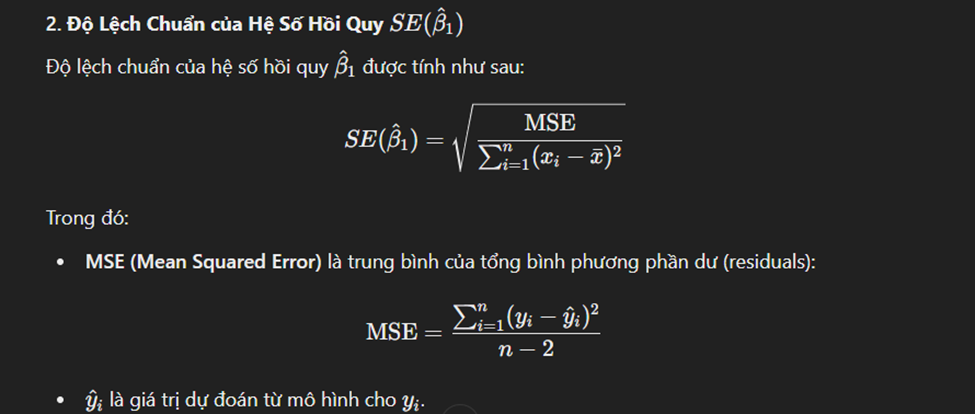
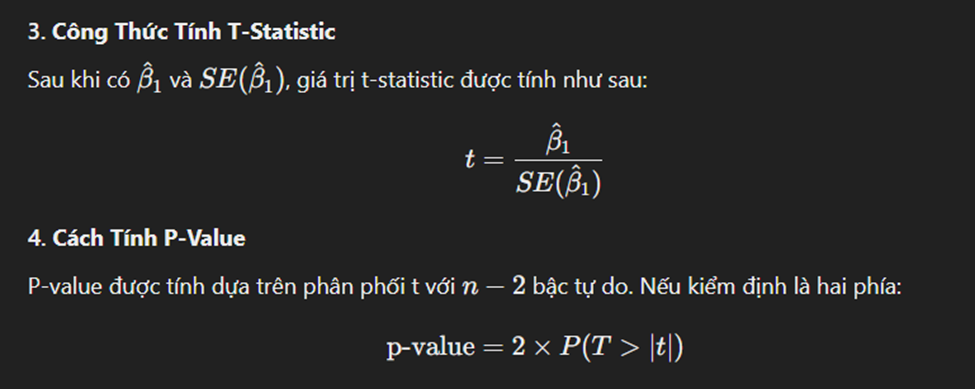

In [ ]:
import math

def linear_regression_t_statistic(x, y):
    # Bước 1: Tính các giá trị trung bình của x và y
    x_mean = x.mean()
    y_mean = y.mean()
    
    # Bước 2: Tính hệ số hồi quy β1
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        numerator += (x_i - x_mean) * (y_i - y_mean)
        denominator += (x_i - x_mean) ** 2
    beta_1 = numerator / denominator
    
    # Bước 3: Tính hệ số chặn β0
    beta_0 = y_mean - beta_1 * x_mean
    
    # Bước 4: Tính giá trị dự đoán ŷ (y_hat)
    y_hat = []  # Danh sách lưu các giá trị dự đoán
    for x_i in x:
        y_i_hat = beta_0 + beta_1 * x_i  # Tính giá trị dự đoán cho mỗi x_i
        y_hat.append(y_i_hat)  # Thêm giá trị dự đoán vào danh sách
    return y_hat
    
    # Bước 5: Tính MSE (Mean Squared Error)
    mse = sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(y, y_hat)) / (len(x) - 2)
    
    # Bước 6: Tính độ lệch chuẩn của hệ số hồi quy SE(β1)
    se_beta_1 = math.sqrt(mse / denominator)
    
    # Bước 7: Tính t-statistic
    t_statistic = beta_1 / se_beta_1
    
    # Bước 8: Tính p-value (cho kiểm định hai phía)
    # Vì p-value phức tạp hơn, ở đây ta sẽ đơn giản trả về t-statistic để tự dò bảng p-value
    return beta_1, se_beta_1, t_statistic



# Tính hệ số hồi quy, độ lệch chuẩn của β1, và t-statistic
beta_1, se_beta_1, t_statistic = linear_regression_t_statistic(X1, X2)

print(f"Hệ số hồi quy (β1): {beta_1}")
print(f"Độ lệch chuẩn của β1: {se_beta_1}")
print(f"T-Statistic: {t_statistic}")


In [ ]:
import statsmodels.api as sm
import numpy as np


# Thêm cột 1s để đại diện cho hệ số chặn (intercept)
X = sm.add_constant(X1)

# Tạo và huấn luyện mô hình hồi quy
model = sm.OLS(X2, X).fit()

# Lấy hệ số hồi quy ước lượng
beta_1 = model.params[1]

# Lấy độ lệch chuẩn của hệ số hồi quy
se_beta_1 = model.bse[1]

# Tính giá trị t-statistic
t_statistic = beta_1 / se_beta_1

# Tính p-value
p_value = model.pvalues[1]

print(f"Hệ số hồi quy ước lượng (β1): {beta_1}")
print(f"Độ lệch chuẩn của β1: {se_beta_1}")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def linear_regression_sklearn(x, y):
    # Chuyển đổi dữ liệu thành numpy arrays và định dạng lại cho phù hợp với sklearn
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    # Khởi tạo mô hình hồi quy tuyến tính và huấn luyện mô hình
    model = LinearRegression()
    model.fit(x, y)
    
    # Tính toán giá trị dự đoán
    y_hat = model.predict(x)
    
    # Lấy các hệ số hồi quy và hệ số chặn
    beta_1 = model.coef_[0]
    beta_0 = model.intercept_
    
    # Tính độ lệch chuẩn của hệ số hồi quy
    residuals = y - y_hat
    mse = np.sum(residuals**2) / (len(x) - 2)
    se_beta_1 = np.sqrt(mse / np.sum((x.flatten() - np.mean(x))**2))
    
    # Tính t-statistic
    t_statistic = beta_1 / se_beta_1
    
    return beta_0, beta_1, se_beta_1, t_statistic, y_hat



# Tính toán các hệ số và giá trị dự đoán
beta_0, beta_1, se_beta_1, t_statistic, y_hat = linear_regression_sklearn(X1, X2)

print(f"Hệ số chặn (β0): {beta_0}")
print(f"Hệ số hồi quy (β1): {beta_1}")
print(f"Độ lệch chuẩn của β1: {se_beta_1}")
print(f"T-Statistic: {t_statistic}")
print(f"Giá trị dự đoán ŷ: {y_hat}")
